In [1]:
import os
import pandas as pd
import numpy as np
from numpy import where
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, auc, roc_auc_score, roc_curve, classification_report, cohen_kappa_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
from sklearn.preprocessing import RobustScaler

In [3]:
from scipy.stats import f_oneway, chi2_contingency
from sklearn.feature_selection import mutual_info_classif

In [4]:
#df = pd.read_csv('df_fe_combined.csv')
df = pd.read_csv('Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)

# Sort dataframe according to month and grid ID
df.sort_values(['MONTH', '1000_GRID_ID'])

# Reset the index without adding an index column
df.reset_index(drop=True, inplace=True)

In [5]:
df.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK,FIRE_RISK_1_MONTH_FORWARD_SHIFT
count,65688,65688,65688,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,...,65688.000000,6.568800e+04,6.568800e+04,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688,65688
unique,714,92,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,Fqp0-LorCOE=,2016-08,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Low Fire-Risk,2-Low Fire-Risk
freq,92,714,5428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52688,53110
mean,NaN,NaN,NaN,2.922086,0.002664,0.836713,0.638945,0.776869,0.513184,0.153711,...,7.008295,1.056695e+01,1.814051e+00,17.186840,37.772828,20.459399,47.296569,28.953340,NaN,NaN
std,NaN,NaN,NaN,5.410334,0.053003,1.981212,1.527666,1.915722,1.148182,0.552054,...,9.069491,5.653440e+00,2.160367e+00,1.528647,2.988427,3.823499,11.158934,8.386024,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.695450,6.846618e+00,2.100000e-02,16.126478,35.986434,19.000000,43.000000,24.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.464216,9.989570e+00,1.141904e+00,17.180753,37.569896,21.000000,50.000000,30.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,16.224446,1.317656e+01,3.089484e+00,18.157613,39.373262,23.000000,54.000000,35.000000,NaN,NaN


In [6]:
df_last_month = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined_last_month.csv', index_col=0)

# Sort dataframe according to month and grid ID
df_last_month.sort_values(['MONTH', '1000_GRID_ID'])

# Reset the index without adding an index column
df_last_month.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65688 entries, 0 to 65687
Data columns (total 82 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   1000_GRID_ID                                                         65688 non-null  object 
 1   MONTH                                                                65688 non-null  object 
 2   CODEMAMROT                                                           65688 non-null  object 
 3   CRIME_COUNT                                                          65688 non-null  float64
 4   Infractions entrainant la mort_CRIME_COUNT                           65688 non-null  float64
 5   Introduction_CRIME_COUNT                                             65688 non-null  float64
 6   Méfait_CRIME_COUNT                                                   65688 non-null  float64
 7   Vol 

In [8]:
df.describe(include='all')

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK,FIRE_RISK_1_MONTH_FORWARD_SHIFT
count,65688,65688,65688,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,...,65688.000000,6.568800e+04,6.568800e+04,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688,65688
unique,714,92,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,Fqp0-LorCOE=,2016-08,REM33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-Low Fire-Risk,2-Low Fire-Risk
freq,92,714,5428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52688,53110
mean,NaN,NaN,NaN,2.922086,0.002664,0.836713,0.638945,0.776869,0.513184,0.153711,...,7.008295,1.056695e+01,1.814051e+00,17.186840,37.772828,20.459399,47.296569,28.953340,NaN,NaN
std,NaN,NaN,NaN,5.410334,0.053003,1.981212,1.527666,1.915722,1.148182,0.552054,...,9.069491,5.653440e+00,2.160367e+00,1.528647,2.988427,3.823499,11.158934,8.386024,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.695450,6.846618e+00,2.100000e-02,16.126478,35.986434,19.000000,43.000000,24.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.464216,9.989570e+00,1.141904e+00,17.180753,37.569896,21.000000,50.000000,30.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,16.224446,1.317656e+01,3.089484e+00,18.157613,39.373262,23.000000,54.000000,35.000000,NaN,NaN


In [9]:
df.tail()

,1000_GRID_ID,MONTH,CODEMAMROT,CRIME_COUNT,Infractions entrainant la mort_CRIME_COUNT,Introduction_CRIME_COUNT,Méfait_CRIME_COUNT,Vol dans / sur véhicule à moteur_CRIME_COUNT,Vol de véhicule à moteur_CRIME_COUNT,Vols qualifiés_CRIME_COUNT,...,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_MONTHLY_RANK,FIRE_RISK_QUATERLY_RANK,FIRE_COMBINED_RISK_RANK,FIRE_RISK,FIRE_RISK_1_MONTH_FORWARD_SHIFT
65683,zzht2gM06A0=,2022-08,REM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.862500,5.400000,-1.906253e-13,17.462500,39.487500,23.0,61.0,35.0,2-Low Fire-Risk,2-Low Fire-Risk
65684,zzht2gM06A0=,2022-09,REM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.332500,5.726667,-1.906253e-13,17.299167,38.019167,25.0,57.0,27.0,2-Low Fire-Risk,2-Low Fire-Risk
65685,zzht2gM06A0=,2022-10,REM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.132500,3.176667,-1.906253e-13,15.899167,33.794167,24.0,61.0,32.0,2-Low Fire-Risk,2-Low Fire-Risk
65686,zzht2gM06A0=,2022-11,REM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.966667,5.403333,3.873333e-01,15.443333,32.238333,24.0,59.0,30.0,2-Low Fire-Risk,2-Low Fire-Risk
65687,zzht2gM06A0=,2022-12,REM17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.808602,7.727527,1.498301e+00,16.676398,34.258898,21.0,59.0,39.0,2-Low Fire-Risk,2-Low Fire-Risk


In [10]:
df.columns

Index(['1000_GRID_ID', 'MONTH', 'CODEMAMROT', 'CRIME_COUNT',
       'Infractions entrainant la mort_CRIME_COUNT',
       'Introduction_CRIME_COUNT', 'Méfait_CRIME_COUNT',
       'Vol dans / sur véhicule à moteur_CRIME_COUNT',
       'Vol de véhicule à moteur_CRIME_COUNT', 'Vols qualifiés_CRIME_COUNT',
       'INCIDENT_COUNT', '1-REPOND_INCIDENT_COUNT', 'AUTREFEU_INCIDENT_COUNT',
       'Alarmes-incendies_INCIDENT_COUNT', 'FAU-ALER_INCIDENT_COUNT',
       'INCENDIE_INCIDENT_COUNT', 'NOUVEAU_INCIDENT_COUNT',
       'SANS FEU_INCIDENT_COUNT', 'FIRE_INCIDENT_COUNT',
       'UNIQUE_FIRE_STATION_COUNT', 'UNIQUE_DIVISION_COUNT',
       'UNITS_DEPLOYED_SUM', 'UNITS_DEPLOYED_MEAN',
       'temperature_2m_max (°C)_MEAN', 'temperature_2m_min (°C)_MEAN',
       'temperature_2m_mean (°C)_MEAN', 'shortwave_radiation_sum (MJ/m²)_MEAN',
       'precipitation_sum (mm)_MEAN', 'rain_sum (mm)_MEAN',
       'snowfall_sum (cm)_MEAN', 'windspeed_10m_max (km/h)_MEAN',
       'windgusts_10m_max (km/h)_MEAN', '

## Drop unecessary columns

In [11]:
df.drop(columns=['CODEMAMROT', 'CRIME_COUNT', 'YEAR',
                 'Infractions entrainant la mort_CRIME_COUNT',
                 'Introduction_CRIME_COUNT', 'Méfait_CRIME_COUNT',
                 'Vol dans / sur véhicule à moteur_CRIME_COUNT',
                 'Vol de véhicule à moteur_CRIME_COUNT', 'Vols qualifiés_CRIME_COUNT',
                 'INCIDENT_COUNT', '1-REPOND_INCIDENT_COUNT', 'AUTREFEU_INCIDENT_COUNT',
                 'Alarmes-incendies_INCIDENT_COUNT', 'FAU-ALER_INCIDENT_COUNT',
                 'INCENDIE_INCIDENT_COUNT', 'NOUVEAU_INCIDENT_COUNT',
                 'SANS FEU_INCIDENT_COUNT', 'FIRE_INCIDENT_COUNT',
                 'UNIQUE_FIRE_STATION_COUNT', 'UNIQUE_DIVISION_COUNT',
                 'UNITS_DEPLOYED_SUM', 'UNITS_DEPLOYED_MEAN', 'AIRE',
                 'FIRE_INCIDENT_QUATERLY_MEAN', 'FIRE_RISK_MONTHLY_RANK',
                 'FIRE_RISK_QUATERLY_RANK', 'FIRE_COMBINED_RISK_RANK', 'FIRE_RISK'], inplace=True)

In [12]:
df_last_month.drop(columns=['CODEMAMROT', 'CRIME_COUNT', 'YEAR',
                        'Infractions entrainant la mort_CRIME_COUNT',
                        'Introduction_CRIME_COUNT', 'Méfait_CRIME_COUNT',
                        'Vol dans / sur véhicule à moteur_CRIME_COUNT',
                        'Vol de véhicule à moteur_CRIME_COUNT', 'Vols qualifiés_CRIME_COUNT',
                        'INCIDENT_COUNT', '1-REPOND_INCIDENT_COUNT', 'AUTREFEU_INCIDENT_COUNT',
                        'Alarmes-incendies_INCIDENT_COUNT', 'FAU-ALER_INCIDENT_COUNT',
                        'INCENDIE_INCIDENT_COUNT', 'NOUVEAU_INCIDENT_COUNT',
                        'SANS FEU_INCIDENT_COUNT', 'FIRE_INCIDENT_COUNT',
                        'UNIQUE_FIRE_STATION_COUNT', 'UNIQUE_DIVISION_COUNT',
                        'UNITS_DEPLOYED_SUM', 'UNITS_DEPLOYED_MEAN', 'AIRE',
                        'FIRE_INCIDENT_QUATERLY_MEAN', 'FIRE_RISK_MONTHLY_RANK',
                        'FIRE_RISK_QUATERLY_RANK', 'FIRE_COMBINED_RISK_RANK', 'FIRE_RISK'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65688 entries, 0 to 65687
Data columns (total 54 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   1000_GRID_ID                                                         65688 non-null  object 
 1   MONTH                                                                65688 non-null  object 
 2   temperature_2m_max (°C)_MEAN                                         65688 non-null  float64
 3   temperature_2m_min (°C)_MEAN                                         65688 non-null  float64
 4   temperature_2m_mean (°C)_MEAN                                        65688 non-null  float64
 5   shortwave_radiation_sum (MJ/m²)_MEAN                                 65688 non-null  float64
 6   precipitation_sum (mm)_MEAN                                          65688 non-null  float64
 7   rain

## Label Encoding

In [14]:
le = LabelEncoder()
df['FIRE_RISK_1_MONTH_FORWARD_SHIFT'] = le.fit_transform(
    df['FIRE_RISK_1_MONTH_FORWARD_SHIFT'])

In [15]:
mapping_target_classes = dict(zip(le.classes_, range(len(le.classes_))))

In [16]:
print(mapping_target_classes)

{'0-High Fire-Risk': 0, '1-Medium Fire-Risk': 1, '2-Low Fire-Risk': 2}


In [17]:
df.describe(include='all')

,1000_GRID_ID,MONTH,temperature_2m_max (°C)_MEAN,temperature_2m_min (°C)_MEAN,temperature_2m_mean (°C)_MEAN,shortwave_radiation_sum (MJ/m²)_MEAN,precipitation_sum (mm)_MEAN,rain_sum (mm)_MEAN,snowfall_sum (cm)_MEAN,windspeed_10m_max (km/h)_MEAN,...,FIRE_INCIDENT_QUATERLY_MAX,CRIME_COUNT_QUATERLY_TOTAL,INCIDENT_COUNT_QUATERLY_TOTAL,UNITS_DEPLOYED_QUATERLY_TOTAL,TEMPERATURE_QUATERLY_MEAN,RAIN_QUATERLY_TOTAL,SNOW_QUATERLY_TOTAL,WINDSPEED_QUATERLY_MEAN,WINDGUSTS_QUATERLY_MEAN,FIRE_RISK_1_MONTH_FORWARD_SHIFT
count,65688,65688,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,...,65688.000000,65688.000000,65688.000000,65688.000000,65688.000000,6.568800e+04,6.568800e+04,65688.000000,65688.000000,65688.000000
unique,714,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Fqp0-LorCOE=,2016-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,92,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.327581,2.723442,7.071079,13.507968,3.283813,2.661760,0.456079,17.170002,...,3.304059,11.694313,52.006485,93.876355,7.008295,1.056695e+01,1.814051e+00,17.186840,37.772828,1.755846
std,NaN,NaN,11.153119,11.106126,11.017013,6.645252,2.759013,2.697419,0.860901,2.815909,...,4.636799,20.286774,78.881452,144.318358,9.069491,5.653440e+00,2.160367e+00,1.528647,2.988427,0.538418
min,NaN,NaN,-21.400000,-31.400000,-25.400000,0.460000,0.000000,0.000000,0.000000,5.500000,...,0.000000,0.000000,0.000000,0.000000,-13.596285,-1.421085e-14,-1.931788e-13,9.712500,21.437500,0.000000
25%,NaN,NaN,0.846711,-6.974194,-2.700000,6.930000,1.733333,1.016667,0.000000,15.335929,...,0.000000,0.000000,1.000000,1.000000,-1.695450,6.846618e+00,2.100000e-02,16.126478,35.986434,2.000000
50%,NaN,NaN,12.166667,4.155159,8.000000,13.666258,2.959175,2.226667,0.000000,17.054839,...,2.000000,4.000000,20.000000,39.000000,7.464216,9.989570e+00,1.141904e+00,17.180753,37.569896,2.000000
75%,NaN,NaN,21.856899,13.102312,17.426667,19.296667,4.092700,3.587625,0.688333,18.653333,...,5.000000,15.000000,74.000000,131.000000,16.224446,1.317656e+01,3.089484e+00,18.157613,39.373262,2.000000


## Feature selection

### Feature filtration method

In this example, we first perform the ANOVA F-test and chi-squared test as described earlier to select features with p-values less than 0.05. We then perform mutual information feature selection using the mutual_info_classif function from scikit-learn to select features with MI scores greater than 0.05.

Finally, we combine the selected features from all three methods using the set function to create a set of unique features, and then convert the set back to a list. This gives us the final list of selected features that we can use for further analysis or modeling.

In [18]:
# Split data into target variable and numerical features
target = df['FIRE_RISK_1_MONTH_FORWARD_SHIFT']
numerical_features = df.drop(['1000_GRID_ID', 'MONTH', 'FIRE_RISK_1_MONTH_FORWARD_SHIFT'], axis=1)

# Perform ANOVA F-test
f_scores, p_values = f_oneway(
    *[numerical_features[target == c] for c in target.unique()])
f_scores = pd.Series(f_scores, index=numerical_features.columns)
p_values = pd.Series(p_values, index=numerical_features.columns)

# Select features with p-value less than 0.05
selected_features_f = p_values[p_values < 0.05].index.tolist()

# Perform chi-squared test
chi2_scores = []
p_values = []
for col in numerical_features:
    contingency_table = pd.crosstab(target, numerical_features[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
chi2_scores = pd.Series(chi2_scores, index=numerical_features.columns)
p_values = pd.Series(p_values, index=numerical_features.columns)

# Select features with p-value less than 0.05
selected_features_chi2 = p_values[p_values < 0.05].index.tolist()

# Perform mutual information feature selection
mi_scores = mutual_info_classif(numerical_features, target)
mi_scores = pd.Series(mi_scores, index=numerical_features.columns)

# Select features with MI score greater than 0.05
selected_features_mi = mi_scores[mi_scores > 0.05].index.tolist()

# Combine selected features from all methods
selected_features = list(set(selected_features_f) | set(
    selected_features_chi2) and set(selected_features_mi))

In [19]:
print(
    f'Number features selected via ANOVA F-test: {len(selected_features_f)}')
print(
    f'Number features selected via Chi-squared test: {len(selected_features_chi2)}')
print(
    f'Number features selected via Mutual information score: {len(selected_features_mi)}')

Number features selected via ANOVA F-test: 49
Number features selected via Chi-squared test: 50
Number features selected via Mutual information score: 43


In [20]:
print(selected_features)

['LAND_AREA_MEAN', 'Méfait_CRIME_COUNT_4_MONTH_BACKWARD_SHIFT', 'Introduction_CRIME_COUNT_4_MONTH_BACKWARD_SHIFT', 'TEMPERATURE_QUATERLY_MEAN', 'Condominium_PROPERTY_ASSESSMENT_COUNT', 'WINDSPEED_QUATERLY_MEAN', 'Régulier_PROPERTY_ASSESSMENT_COUNT', '1-REPOND_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT', 'BUILDING_AREA_MEAN', 'precipitation_sum (mm)_MEAN', 'HEIGHT_ABOVE_GROUND_MEAN', 'temperature_2m_mean (°C)_MEAN', 'CRIME_COUNT_4_MONTH_BACKWARD_SHIFT', 'UNITS_DEPLOYED_MEAN_4_MONTH_BACKWARD_SHIFT', 'RAIN_QUATERLY_TOTAL', 'temperature_2m_min (°C)_MEAN', 'rain_sum (mm)_MEAN', 'SNOW_QUATERLY_TOTAL', 'UNIQUE_FIRE_STATION_COUNT_4_MONTH_BACKWARD_SHIFT', 'UNITS_DEPLOYED_QUATERLY_TOTAL', 'WINDGUSTS_QUATERLY_MEAN', 'windspeed_10m_max (km/h)_MEAN', 'winddirection_10m_dominant (°)_MEAN', 'windgusts_10m_max (km/h)_MEAN', 'SANS FEU_INCIDENT_COUNT_4_MONTH_BACKWARD_SHIFT', 'temperature_2m_max (°C)_MEAN', 'INCIDENT_COUNT_QUATERLY_TOTAL', 'POPULATION_SUM', 'UNITS_DEPLOYED_SUM_4_MONTH_BACKWARD_SHIFT', 'et0_fa

In [21]:
selected_features_combined = selected_features + \
    ['1000_GRID_ID', 'MONTH', 'FIRE_RISK_1_MONTH_FORWARD_SHIFT']
selected_features_combined_lm = selected_features + \
    ['1000_GRID_ID', 'MONTH']

In [22]:
df_final_selected = df[selected_features_combined]
df_final_selected_last_month = df_last_month[selected_features_combined_lm]

### Feature correlation analysis

In [23]:
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

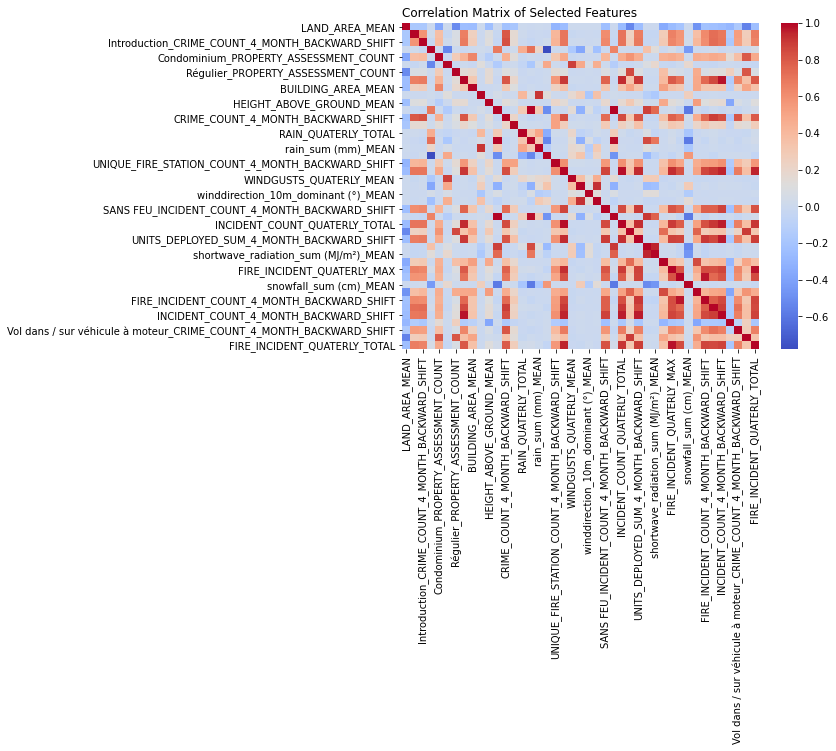

In [28]:
df_selected = df[selected_features]
corr_matrix = df_selected.corr()

# create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

# add title to heatmap
plt.title('Correlation Matrix of Selected Features', loc='left')

# display the chart
plt.show();


In [29]:
# File Output
feature_selected_corr_matrix_chart_name = 'feature_selected_corr_matrix.png'
feature_selected_corr_matrix_file_path = 'Data/Data_visualization_folders/feature_engineering/' + \
    feature_selected_corr_matrix_chart_name
if os.path.exists(feature_selected_corr_matrix_chart_name):
    os.remove(feature_selected_corr_matrix_chart_name)
    # Save the plot to a file
    fig.savefig(feature_selected_corr_matrix_file_path,
                dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(feature_selected_corr_matrix_file_path,
                dpi=300, bbox_inches='tight')

# Output file

In [30]:
# Output file to folder
file_name = 'df_fe_selected.csv'
if os.path.exists(file_name):
    os.remove(file_name)
df_final_selected.to_csv(
    'Data/Processed_Datasets/Combined_tables/' + file_name)

In [31]:
# Output file to folder
file_name = 'df_fe_selected_last_month.csv'
if os.path.exists(file_name):
    os.remove(file_name)
df_final_selected_last_month.to_csv(
    'Data/Processed_Datasets/Combined_tables/' + file_name)